In [17]:
import sys
sys.path.append("/Users/PredatoryMink/Statistics")

import numpy as np
import pandas as pd
import math as mt
import scipy.stats as st
import scipy.optimize as opt
import scipy.special as sp
import scipy.optimize as opt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from collections import namedtuple
from tqdm import tqdm
from mystats.utils import plot

### Задание 1

In [18]:
def wiener_series(S, N=10_000):
    seg = [0, 1]
    z = st.norm().rvs(N)
    ts = np.linspace(*seg, S)
    steps = np.pi * np.arange(1/2, N, 1)
    process = np.zeros(S)
    for i in range(S):
        coef = 2**0.5 * np.sin(ts[i] * steps) / steps
        process[i] = np.dot(z, coef)
    return (ts, process)

In [3]:
S = 10_000
ts, process = wiener_series(S)

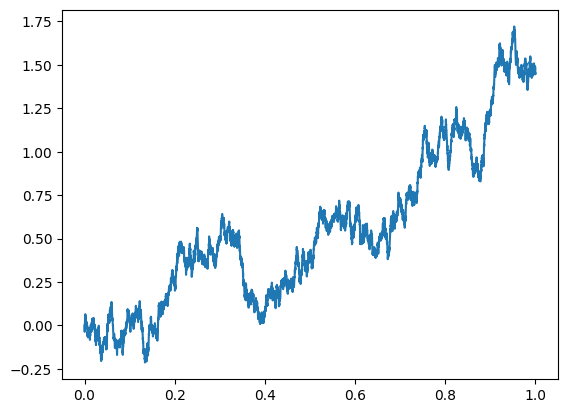

In [4]:
plt.plot(ts, process);

ShapiroResult(statistic=0.9972214423293323, pvalue=0.08273100147236342)


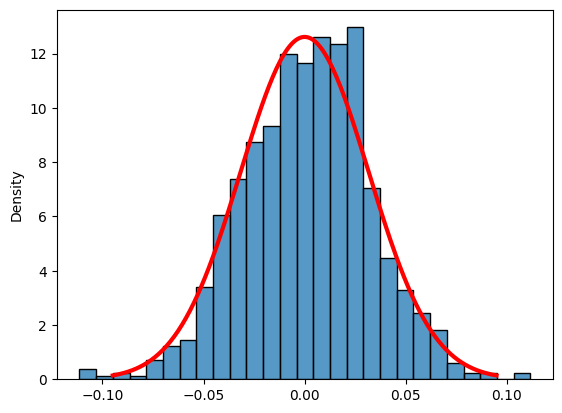

In [5]:
STEP = S // 1000
var = STEP / S
incr = np.diff(process[::STEP])

print(st.shapiro(incr))

sns.histplot(incr, stat='density');
xs = np.linspace(-3*var**0.5, 3*var**0.5, 200)
ys = st.norm(0, var**0.5).pdf(xs)
plt.plot(xs, ys, c='r', lw=3);

### Задание 2

In [6]:
S = 100_000
ts, brow = wiener_series(S)
for i in range(S - 1, 0, -1):
    if (brow[i - 1] * brow[i] <= 0):
        ts, izvilina = ts[i:], brow[i:]
        break

In [7]:
izvilina /= mt.sqrt(1 - ts[0])
ts = (ts - ts[0]) / ts[-1]

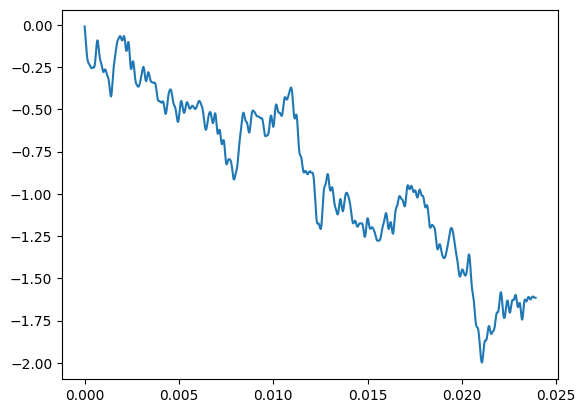

In [8]:
plt.plot(ts, izvilina);

### Задание 3

In [9]:
K = 1000
S = 1_000
N = 10_000
eps = 1e-9

stat = np.zeros(K)
for i in tqdm(range(K)):
    ts, brow = wiener_series(S, N)
    mx = np.max(brow)
    for j in range(S - 1, -1, -1):
        if (abs(brow[j] - mx) < eps):
            stat[i] = ts[j]
            break

100%|███████████████████████████████████████| 1000/1000 [00:51<00:00, 19.26it/s]


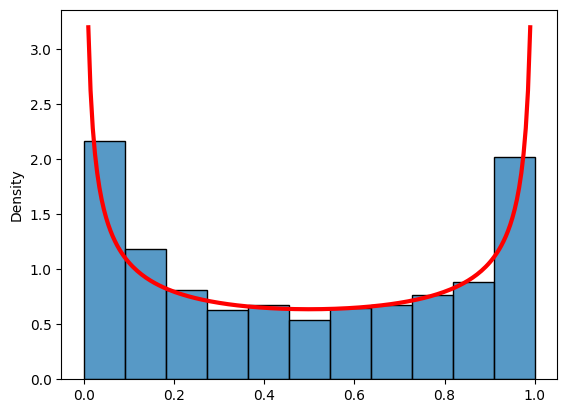

In [10]:
sns.histplot(stat, stat='density');
eps = 1e-2
xs = np.linspace(eps, 1 - eps, 200)
ys = 1 / (np.pi * np.sqrt(xs * (1 - xs)))
plt.plot(xs, ys, c='r', lw=3);

In [19]:
def arcsin_law(step, K=1000, N=10_000):
    stat = np.zeros(K)
    for i in range(K):
        process = step.rvs(N).cumsum()
        mx = np.argmax(process[::-1])
        stat[i] = mx / N
    return stat

In [20]:
class Bern_sym:
    def __init__(self, p=1/2):
        self.bern = st.bernoulli(p)

    def rvs(self, shape):
        return 2 * self.bern.rvs(shape) - 1

In [22]:
class Dasha:
    def __init__(self, p=1/2):
        self.bern_sym = Bern_sym(p)

    def rvs(self, shape):
        return self.bern_sym.rvs(shape) * (st.uniform().rvs(shape)) ** (-6/7) + 2

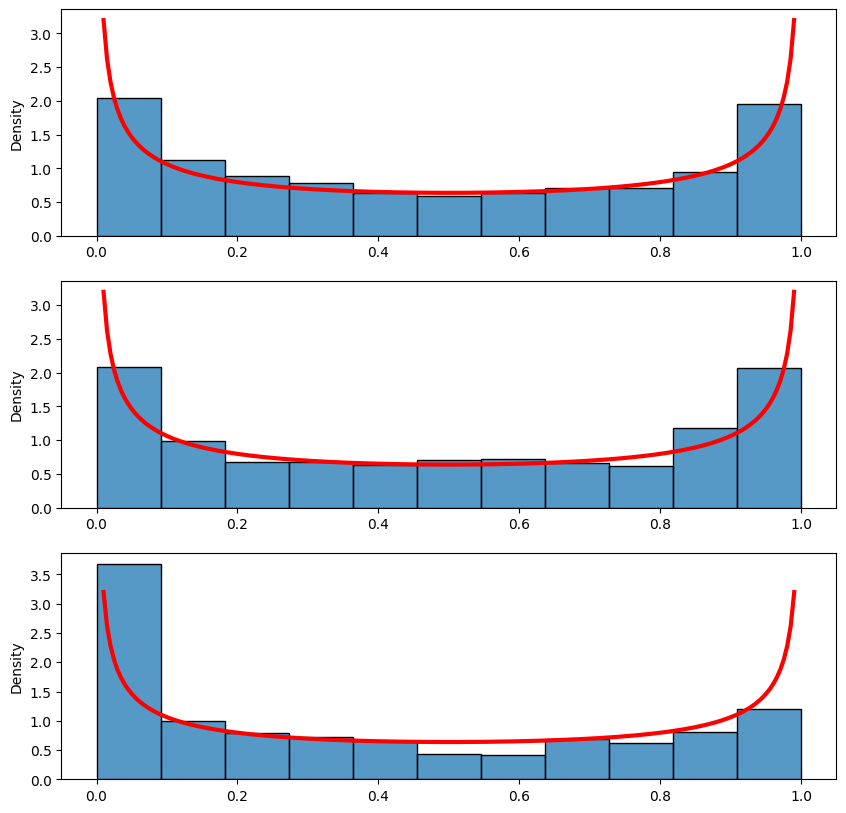

In [23]:
steps = [st.norm(), Bern_sym(), Dasha(1/3)]

width, height = 10, 10
fig, axes = plt.subplots(len(steps), 1, figsize=(width, height))

for ax, step in zip(axes, steps):
    stat = arcsin_law(step)
    sns.histplot(stat, stat='density', ax=ax);
    eps = 1e-2
    xs = np.linspace(eps, 1 - eps, 200)
    ys = 1 / (np.pi * np.sqrt(xs * (1 - xs)))
    ax.plot(xs, ys, c='r', lw=3);

### Задание 4

In [15]:
N = 100_000
K = 1_000

stat = np.zeros(K)
for i in tqdm(range(K)):
    steps = np.ones(2 * N, dtype=int)
    down = np.random.choice(2*N, size=N, replace=False)
    steps[down] = -1
    process = steps.cumsum()
    process_sign = (process > 0).astype(int)
    time = np.sum(process_sign) + np.sum(np.abs(np.diff(process_sign))) // 2
    stat[i] = time / (2 * N)

100%|██████████████████████████████████████| 1000/1000 [00:03<00:00, 311.01it/s]


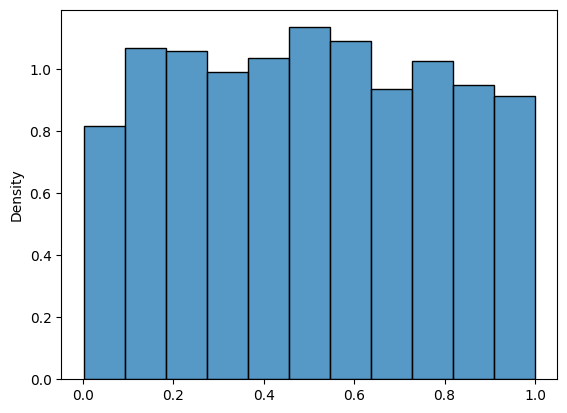

In [16]:
sns.histplot(stat, stat='density');